#  Predicting Heart Disease

##### Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

## Problem Statement

#### Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:
• 0 represents no heart disease present\
• 1 represents heart disease present


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_csv('values.csv')
d2 = pd.read_csv('labels.csv')


In [3]:
d1.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  
0                      170                        0  
1                      158                        0  
2                      162                        1  
3                      181                        0  
4                      145                        0

In [4]:
d2.head()

patient_id  heart_disease_present
0     0z64un                      0
1     ryoo3j                      0
2     yt1s1x                      1
3     l2xjde                      1
4     oyt4ek                      0

In [5]:
d1.shape ,d2.shape

((180, 14), (180, 2))

In [6]:
df = d1.merge(d2)
df

patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1                       110                3                  0   
2                       125                4                  3   
3                       152                4                  0   
4                       178                1                  0   
..                      ...              ...                ...   
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                       0                    2   
1                                       0                    0   
2                                       0                    2   
3                                       0                    0   
4                                       0                    2   
..                                    ...                  ...   
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                            308                       0.0    1   45   
1                            214                       1.6    0   54   
2                            304                       0.0    1   77   
3                            223                       0.0    1   40   
4                            270                       4.2    1   59   
..                           ...                       ...  ...  ...   
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
0                        170                        0                      0  
1                        158                        0                      0  
2                        162                        1                      1  
3                        181                        0                      1  
4                        145                        0                      0  
..                       ...                      ...                    ...  
175                      163                        0                      1  
176                      117                

In [7]:
df.shape

(180, 15)

In [8]:
df1 = df.rename(columns={'slope_of_peak_exercise_st_segment':'slope','resting_blood_pressure':'restbp','chest_pain_type':'chestpt',
                         'num_major_vessels':'vessels','fasting_blood_sugar_gt_120_mg_per_dl':'fbs',
                         'resting_ekg_results':'restekg','serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak',
                         'max_heart_rate_achieved':'maxhr','exercise_induced_angina':'exrang','heart_disease_present':'target'
                         })
df1.head(10)

patient_id  slope               thal  restbp  chestpt  vessels  fbs  \
0     0z64un      1             normal     128        2        0    0   
1     ryoo3j      2             normal     110        3        0    0   
2     yt1s1x      1             normal     125        4        3    0   
3     l2xjde      1  reversible_defect     152        4        0    0   
4     oyt4ek      3  reversible_defect     178        1        0    0   
5     ldukkw      1             normal     130        3        0    0   
6     2gbyh9      2  reversible_defect     150        4        2    0   
7     daa9kp      2       fixed_defect     150        4        1    0   
8     3nwy2n      3  reversible_defect     170        4        0    0   
9     1r508r      2             normal     120        3        0    0   

   restekg  chol  oldpeak  sex  age  maxhr  exrang  target  
0        2   308      0.0    1   45    170       0       0  
1        0   214      1.6    0   54    158       0       0  
2        2   304      0.0    1   77    162       1       1  
3        0   223      0.0    1   40    181       0       1  
4        2   270      4.2    1   59    145       0       0  
5        0   180      0.0    1   42    150       0       0  
6        2   258      2.6    0   60    157       0       1  
7        2   276      0.6    1   57    112       1       1  
8        2   326      3.4    1   59    140       1       1  
9        0   219      1.6    0   50    158       0       0

In [9]:
df1.shape

(180, 15)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  180 non-null    object 
 1   slope       180 non-null    int64  
 2   thal        180 non-null    object 
 3   restbp      180 non-null    int64  
 4   chestpt     180 non-null    int64  
 5   vessels     180 non-null    int64  
 6   fbs         180 non-null    int64  
 7   restekg     180 non-null    int64  
 8   chol        180 non-null    int64  
 9   oldpeak     180 non-null    float64
 10  sex         180 non-null    int64  
 11  age         180 non-null    int64  
 12  maxhr       180 non-null    int64  
 13  exrang      180 non-null    int64  
 14  target      180 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 22.5+ KB


In [11]:
df1.describe()

slope      restbp     chestpt     vessels         fbs     restekg  \
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
mean     1.550000  131.311111    3.155556    0.694444    0.161111    1.050000   
std      0.618838   17.010443    0.938454    0.969347    0.368659    0.998742   
min      1.000000   94.000000    1.000000    0.000000    0.000000    0.000000   
25%      1.000000  120.000000    3.000000    0.000000    0.000000    0.000000   
50%      1.000000  130.000000    3.000000    0.000000    0.000000    2.000000   
75%      2.000000  140.000000    4.000000    1.000000    0.000000    2.000000   
max      3.000000  180.000000    4.000000    3.000000    1.000000    2.000000   

             chol     oldpeak         sex         age       maxhr      exrang  \
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
mean   249.211111    1.010000    0.688889   54.811111  149.483333    0.316667   
std     52.717969    1.121357    0.464239    9.334737   22.063513    0.466474   
min    126.000000    0.000000    0.000000   29.000000   96.000000    0.000000   
25%    213.750000    0.000000    0.000000   48.000000  132.000000    0.000000   
50%    245.500000    0.800000    1.000000   55.000000  152.000000    0.000000   
75%    281.250000    1.600000    1.000000   62.000000  166.250000    1.000000   
max    564.000000    6.200000    1.000000   77.000000  202.000000    1.000000   

           target  
count  180.000000  
mean     0.444444  
std      0.498290  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [12]:
df1.isnull().sum()

patient_id    0
slope         0
thal          0
restbp        0
chestpt       0
vessels       0
fbs           0
restekg       0
chol          0
oldpeak       0
sex           0
age           0
maxhr         0
exrang        0
target        0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

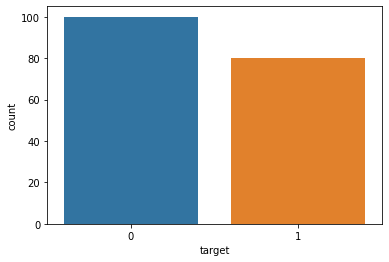

In [13]:
sns.countplot(df1.target)     #seems like balanced data 

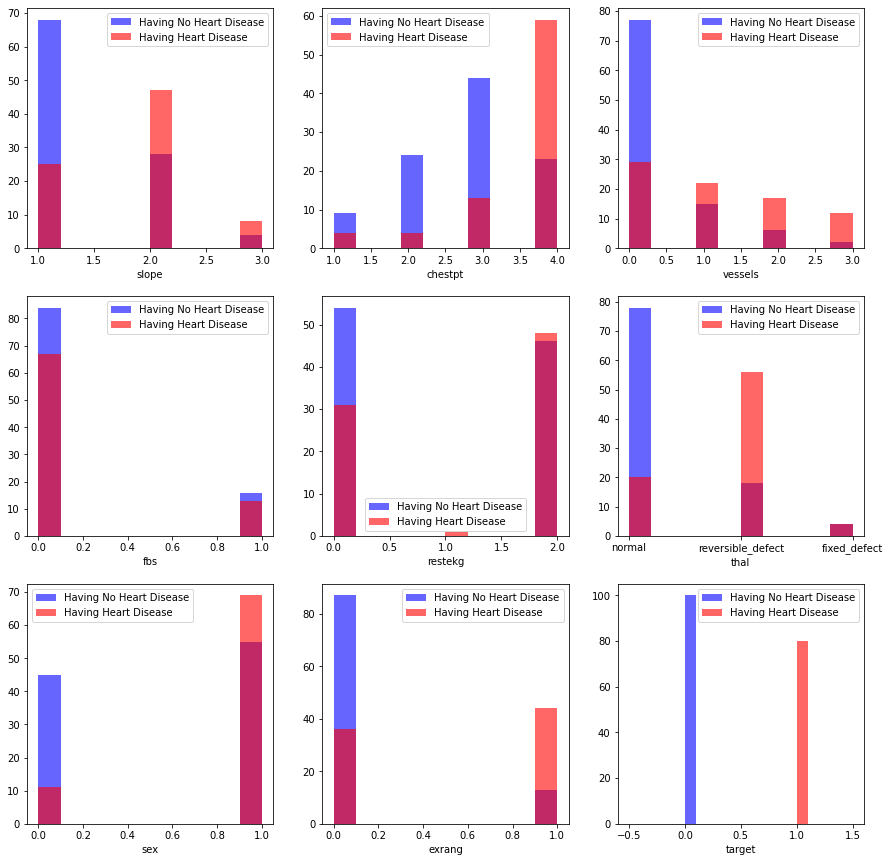

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.hist(df1[df1['target']==0]['slope'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['slope'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('slope')
plt.legend()

plt.subplot(3,3,2)
plt.hist(df1[df1['target']==0]['chestpt'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['chestpt'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('chestpt')
plt.legend()

plt.subplot(3,3,3)
plt.hist(df1[df1['target']==0]['vessels'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['vessels'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('vessels')
plt.legend()

plt.subplot(3,3,4)
plt.hist(df1[df1['target']==0]['fbs'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['fbs'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('fbs')
plt.legend()

plt.subplot(3,3,5)
plt.hist(df1[df1['target']==0]['restekg'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['restekg'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('restekg')
plt.legend()

plt.subplot(3,3,6)
plt.hist(df1[df1['target']==0]['thal'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['thal'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('thal')
plt.legend()

plt.subplot(3,3,7)
plt.hist(df1[df1['target']==0]['sex'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['sex'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('sex')
plt.legend()

plt.subplot(3,3,8)
plt.hist(df1[df1['target']==0]['exrang'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['exrang'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('exrang')
plt.legend()

plt.subplot(3,3,9)
plt.hist(df1[df1['target']==0]['target'],color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['target'],color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('target')
plt.legend()

##### slope :
People with slope value equal to 2  are more likely to have heart disease than people with slope value equal to 1  or 3.

#### chestpt:
People with cp equl to 4,3 are more likely to have heart disease than people with cp equal to 1 or 2.

#### Vessels
people with  major_num_vessels 0 are more likely to have heart disease.

#### fbs
fasting blood sugar level greater than 

#### Sex
It seems like male has more chances of having heart disease 

#### Exercise induced angina 
pain occurs when not enough blood flows to heart muscle,which causes more heart disease 

#### Resting ECG
People who has resting ecg result 2 are more chances of getting heart disease

#### Thal(Thalassemia)
reverible defect thal has more like of having heart disease




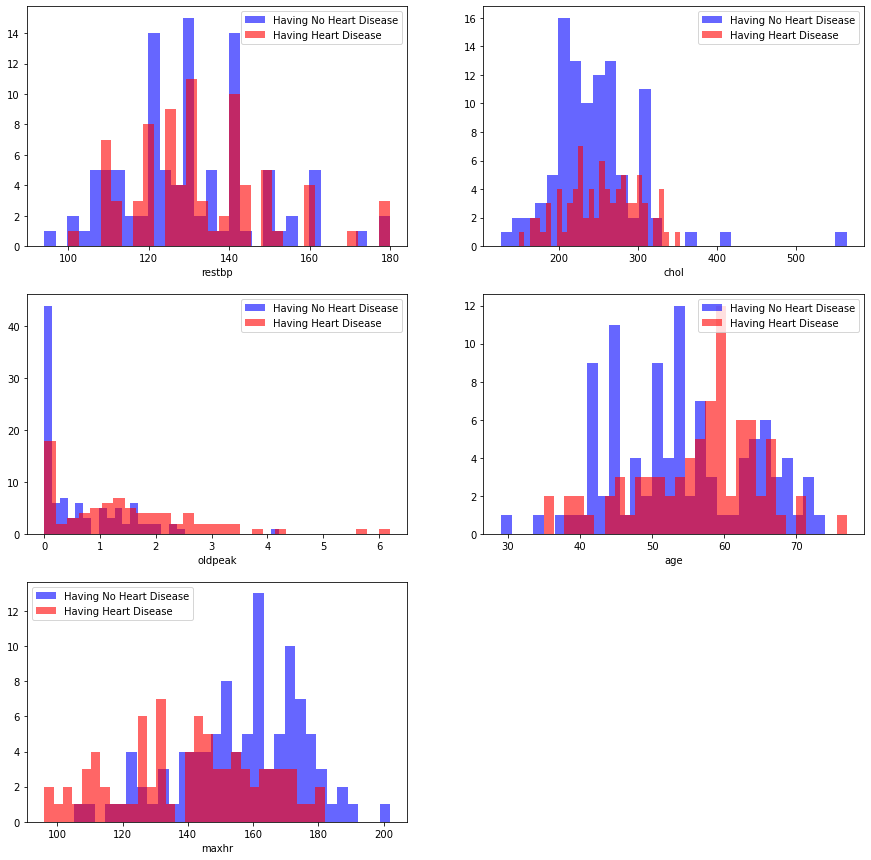

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.hist(df1[df1['target']==0]['restbp'],bins=30,color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['restbp'],bins=30,color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('restbp')
plt.legend()

plt.subplot(3,2,2)
plt.hist(df1[df1['target']==0]['chol'],bins=30,color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['chol'],bins=30,color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('chol')
plt.legend()

plt.subplot(3,2,3)
plt.hist(df1[df1['target']==0]['oldpeak'],bins=30,color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['oldpeak'],bins=30,color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('oldpeak')
plt.legend()

plt.subplot(3,2,4)
plt.hist(df1[df1['target']==0]['age'],bins=30,color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['age'],bins=30,color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('age')
plt.legend()

plt.subplot(3,2,5)
plt.hist(df1[df1['target']==0]['maxhr'],bins=30,color='blue',label='Having No Heart Disease',alpha=.6)
plt.hist(df1[df1['target']==1]['maxhr'],bins=30,color='red',label='Having Heart Disease',alpha=.6)
plt.xlabel('maxhr')
plt.legend()

#### Rest BP
resting bp typically in between 120 to 140 has  more chance having heart disease

#### Chol 
chol level above 200 are more likely to have disease

#### Heart rate
heart rate should be in between 140 to 180 for not getting heart disease


### labeling cat vaiables

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [17]:
df1.thal = le.fit_transform(df1.thal)
df1

patient_id  slope  thal  restbp  chestpt  vessels  fbs  restekg  chol  \
0       0z64un      1     1     128        2        0    0        2   308   
1       ryoo3j      2     1     110        3        0    0        0   214   
2       yt1s1x      1     1     125        4        3    0        2   304   
3       l2xjde      1     2     152        4        0    0        0   223   
4       oyt4ek      3     2     178        1        0    0        2   270   
..         ...    ...   ...     ...      ...      ...  ...      ...   ...   
175     5qfar3      2     2     125        4        2    1        0   254   
176     2s2b1f      2     1     180        4        0    0        1   327   
177     nsd00i      2     2     125        3        0    0        0   309   
178     0xw93k      1     1     124        3        2    1        0   255   
179     2nx10r      1     1     160        3        1    0        0   201   

     oldpeak  sex  age  maxhr  exrang  target  
0        0.0    1   45    170       0       0  
1        1.6    0   54    158       0       0  
2        0.0    1   77    162       1       1  
3        0.0    1   40    181       0       1  
4        4.2    1   59    145       0       0  
..       ...  ...  ...    ...     ...     ...  
175      0.2    1   67    163       0       1  
176      3.4    0   55    117       1       1  
177      1.8    1   64    131       1       1  
178      0.0    1   48    175       0       0  
179      0.0    0   54    163       0       0  

[180 rows x 15 columns]

<AxesSubplot:>

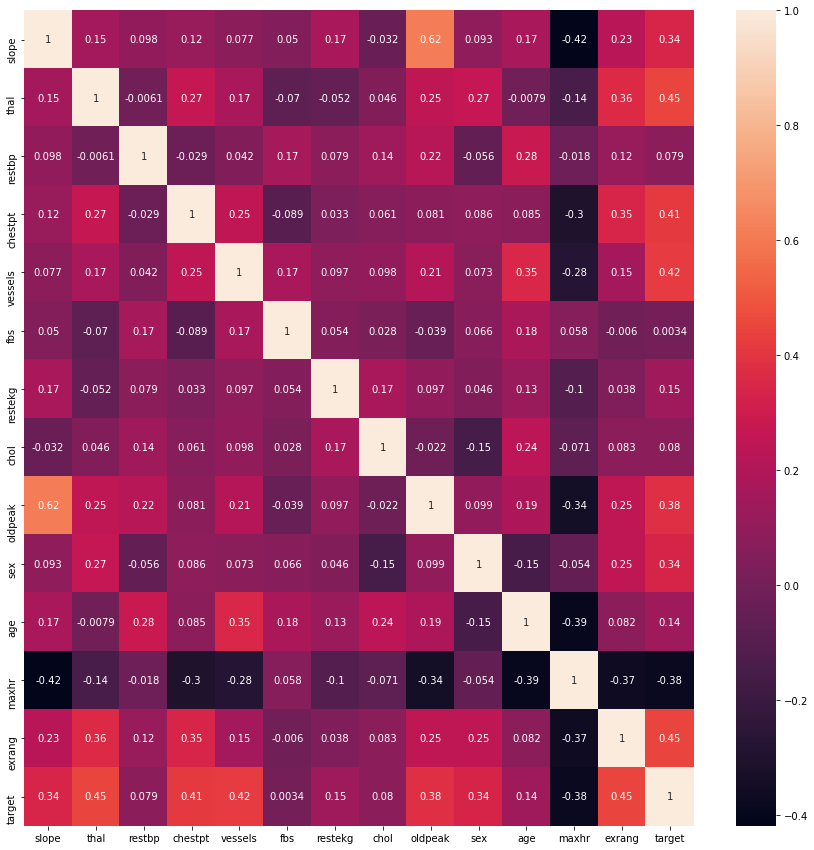

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)


In [19]:
df1.corr()

slope      thal    restbp   chestpt   vessels       fbs   restekg  \
slope    1.000000  0.154101  0.098287  0.121207  0.076832  0.050199  0.172191   
thal     0.154101  1.000000 -0.006088  0.269583  0.174107 -0.070225 -0.052171   
restbp   0.098287 -0.006088  1.000000 -0.029296  0.042388  0.166570  0.078986   
chestpt  0.121207  0.269583 -0.029296  1.000000  0.249061 -0.088992  0.033379   
vessels  0.076832  0.174107  0.042388  0.249061  1.000000  0.169792  0.096656   
fbs      0.050199 -0.070225  0.166570 -0.088992  0.169792  1.000000  0.053864   
restekg  0.172191 -0.052171  0.078986  0.033379  0.096656  0.053864  1.000000   
chol    -0.032348  0.046448  0.144881  0.061213  0.098348  0.027560  0.170839   
oldpeak  0.615948  0.251972  0.219026  0.080799  0.214062 -0.039055  0.097321   
sex      0.093340  0.265420 -0.055589  0.086057  0.073107  0.066010  0.045786   
age      0.169918 -0.007934  0.284402  0.085001  0.347355  0.176101  0.126856   
maxhr   -0.418102 -0.142098 -0.017521 -0.301792 -0.275687  0.058369 -0.102766   
exrang   0.225459  0.360395  0.123397  0.346266  0.153407 -0.005956  0.037773   
target   0.344224  0.447214  0.078506  0.412829  0.421519  0.003379  0.145933   

             chol   oldpeak       sex       age     maxhr    exrang    target  
slope   -0.032348  0.615948  0.093340  0.169918 -0.418102  0.225459  0.344224  
thal     0.046448  0.251972  0.265420 -0.007934 -0.142098  0.360395  0.447214  
restbp   0.144881  0.219026 -0.055589  0.284402 -0.017521  0.123397  0.078506  
chestpt  0.061213  0.080799  0.086057  0.085001 -0.301792  0.346266  0.412829  
vessels  0.098348  0.214062  0.073107  0.347355 -0.275687  0.153407  0.421519  
fbs      0.027560 -0.039055  0.066010  0.176101  0.058369 -0.005956  0.003379  
restekg  0.170839  0.097321  0.045786  0.126856 -0.102766  0.037773  0.145933  
chol     1.000000 -0.021932 -0.152296  0.236211 -0.071038  0.083139  0.079775  
oldpeak -0.021932  1.000000  0.099374  0.189700 -0.341045  0.249167  0.382930  
sex     -0.152296  0.099374  1.000000 -0.148997 -0.053960  0.251096  0.335421  
age      0.236211  0.189700 -0.148997  1.000000 -0.394630  0.081811  0.138255  
maxhr   -0.071038 -0.341045 -0.053960 -0.394630  1.000000 -0.365065 -0.375352  
exrang   0.083139  0.249167  0.251096  0.081811 -0.365065  1.000000  0.448647  
target   0.079775  0.382930  0.335421  0.138255 -0.375352  0.448647  1.000000

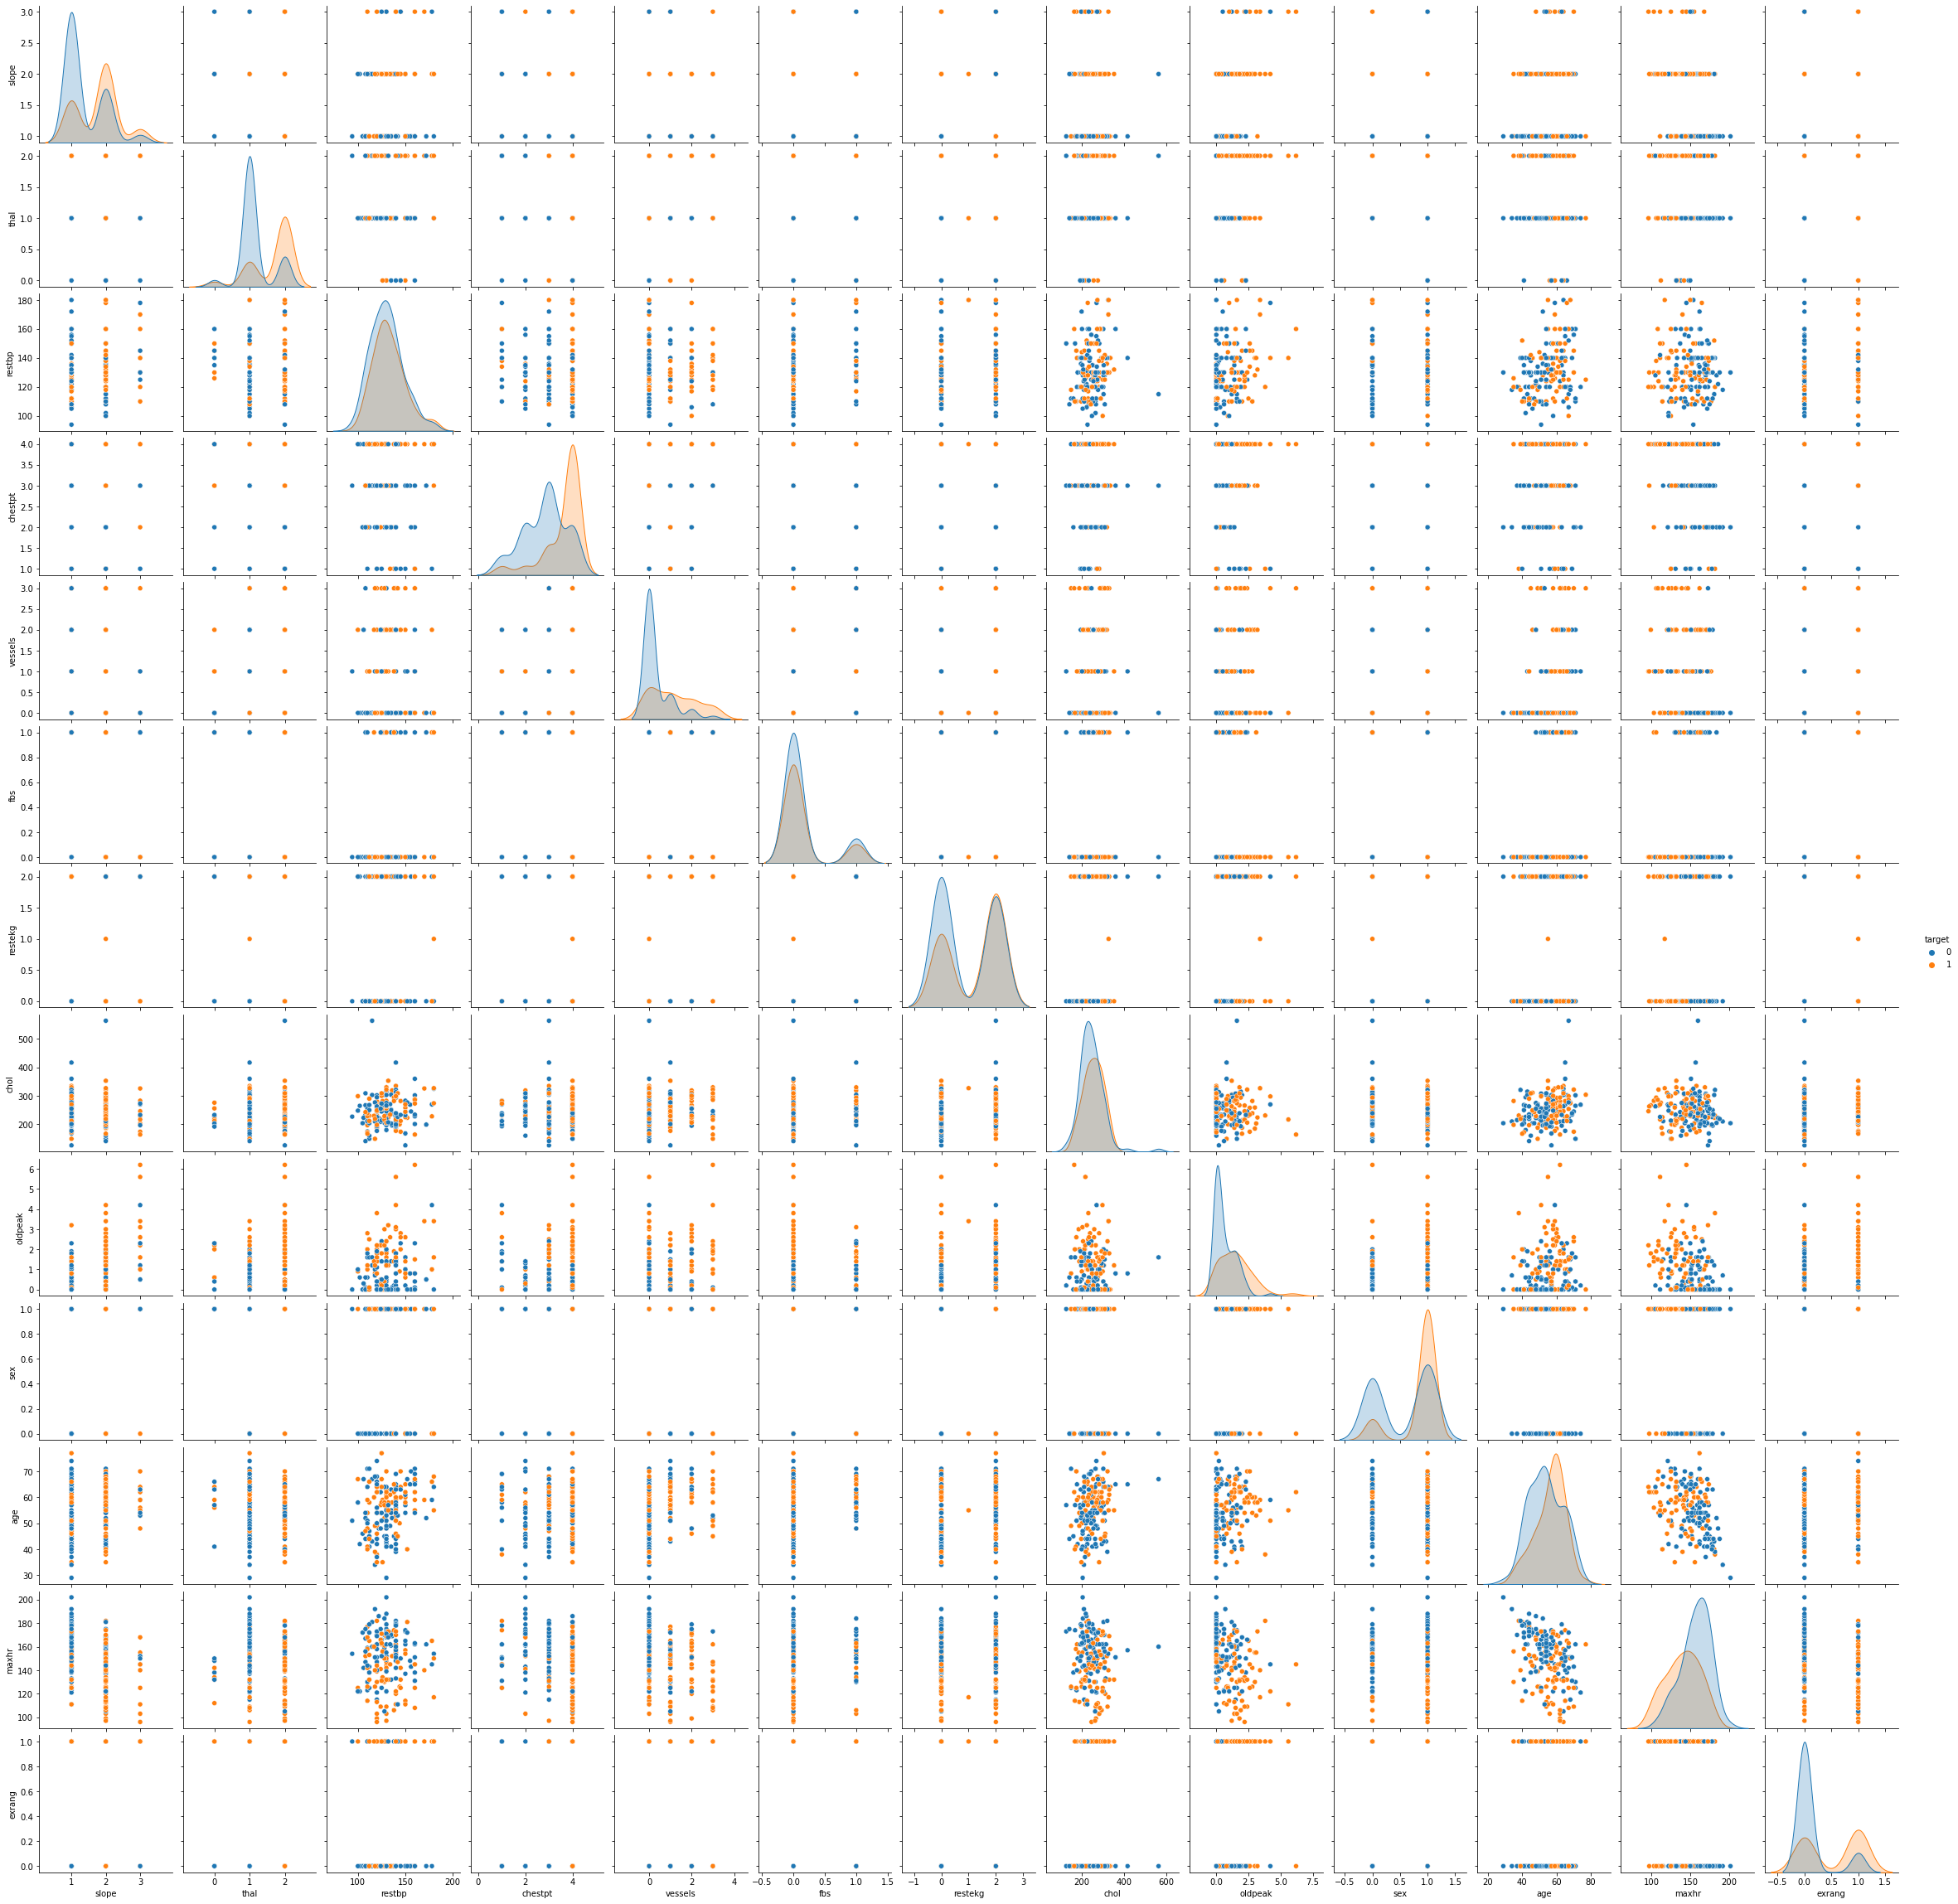

In [20]:
sns.pairplot(df1,hue='target')
plt.savefig("pairplot.png")

<AxesSubplot:xlabel='maxhr'>

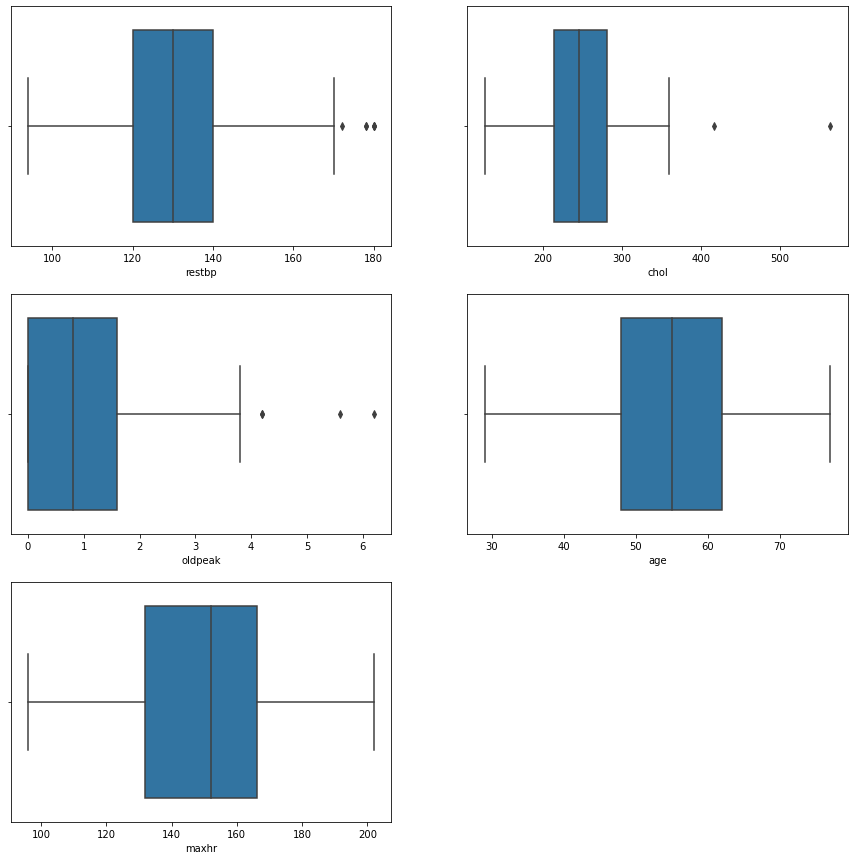

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(df1.restbp)
plt.subplot(3,2,2)
sns.boxplot(df1.chol)
plt.subplot(3,2,3)
sns.boxplot(df1.oldpeak)
plt.subplot(3,2,4)
sns.boxplot(df1.age)
plt.subplot(3,2,5)
sns.boxplot(df1.maxhr)

In [158]:
df2=df1.drop('patient_id',axis=1)
df2

slope  thal  restbp  chestpt  vessels  fbs  restekg  chol  oldpeak  sex  \
0        1     1     128        2        0    0        2   308      0.0    1   
1        2     1     110        3        0    0        0   214      1.6    0   
2        1     1     125        4        3    0        2   304      0.0    1   
3        1     2     152        4        0    0        0   223      0.0    1   
4        3     2     178        1        0    0        2   270      4.2    1   
..     ...   ...     ...      ...      ...  ...      ...   ...      ...  ...   
175      2     2     125        4        2    1        0   254      0.2    1   
176      2     1     180        4        0    0        1   327      3.4    0   
177      2     2     125        3        0    0        0   309      1.8    1   
178      1     1     124        3        2    1        0   255      0.0    1   
179      1     1     160        3        1    0        0   201      0.0    0   

     age  maxhr  exrang  target  
0     45    170       0       0  
1     54    158       0       0  
2     77    162       1       1  
3     40    181       0       1  
4     59    145       0       0  
..   ...    ...     ...     ...  
175   67    163       0       1  
176   55    117       1       1  
177   64    131       1       1  
178   48    175       0       0  
179   54    163       0       0  

[180 rows x 14 columns]

<AxesSubplot:title={'center':'Correlation with target'}>

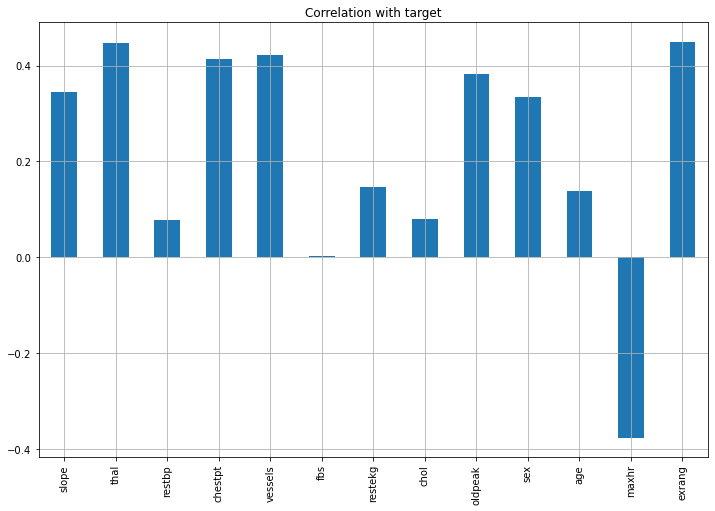

In [159]:
df2.drop('target', axis=1).corrwith(df2.target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [160]:
df2.drop('target', axis=1).corrwith(df2.target)

slope      0.344224
thal       0.447214
restbp     0.078506
chestpt    0.412829
vessels    0.421519
fbs        0.003379
restekg    0.145933
chol       0.079775
oldpeak    0.382930
sex        0.335421
age        0.138255
maxhr     -0.375352
exrang     0.448647
dtype: float64

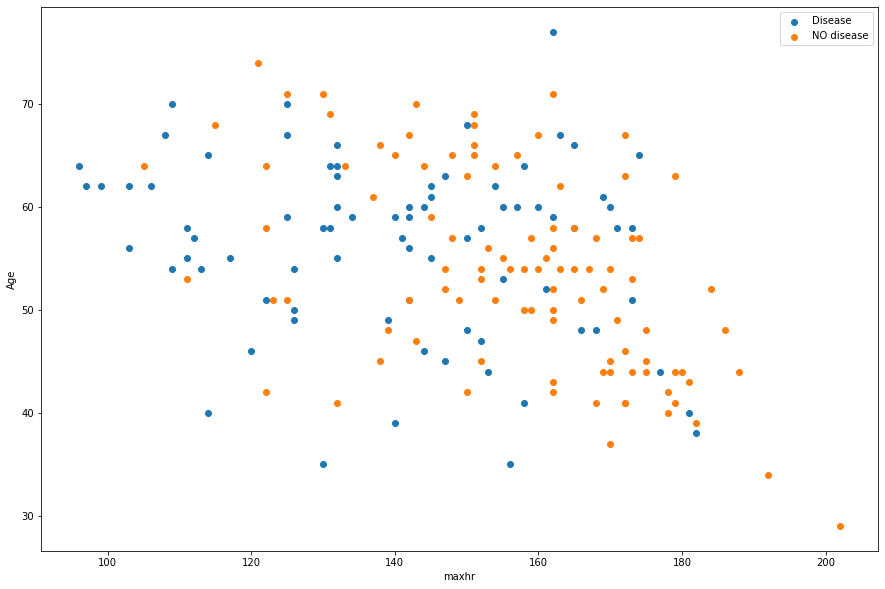

In [161]:
plt.figure(figsize=(15,10))

plt.scatter(df2.maxhr[df2.target==1],df2.age[df2.target==1])
plt.scatter(df2.maxhr[df2.target==0],df2.age[df2.target==0])

plt.xlabel('maxhr')
plt.ylabel('Age')
plt.legend(['Disease','NO disease'])


In [162]:
#from sklearn.preprocessing import StandardScaler
#scale=StandardScaler()
#df2[['restbp','chol','oldpeak','age','maxhr']]=scale.fit_transform(df2[['restbp','chol','oldpeak','age','maxhr']])
#df2

In [191]:
X=df2.drop('target',axis=1)
y=df2.target
X.shape,y.shape

((180, 13), (180,))

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score


In [201]:
classifier = LogisticRegression(C=0.23357214690901212,
 penalty='l2',
 solver='newton-cg')
score=cross_val_score(classifier,X,y,cv=10)
score.mean()

0.85

In [183]:
classifier1 =DecisionTreeClassifier(max_depth=5)
score=cross_val_score(classifier1,X,y,cv=10)
score.mean()

0.7833333333333333

In [180]:
classifier2 =KNeighborsClassifier(n_neighbors=13)
score=cross_val_score(classifier2,X,y,cv=10)
score.mean()

0.5999999999999999

In [168]:
classifier3 =SVC()
score=cross_val_score(classifier3,X,y,cv=10)
score.mean()

0.611111111111111

In [169]:
classifier4 =RandomForestClassifier(n_estimators=10)
score=cross_val_score(classifier4,X,y,cv=10,)
score.mean()

0.788888888888889

In [47]:
classifier.fit(X,y)

LogisticRegression()

In [51]:
rfe=RFE(classifier,n_features_to_select=10, verbose=1)
rfe.fit(X,y)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, verbose=1)

In [35]:
from sklearn.feature_selection import RFE


In [52]:
rfe.n_features_

10

In [53]:
rfe.ranking_

array([1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1])

In [41]:
classifier1.fit(X,y)
classifier1.feature_importances_

array([0.04337413, 0.27577766, 0.0385    , 0.10623892, 0.12261791,
       0.018     , 0.01730769, 0.0874892 , 0.0933444 , 0.08046429,
       0.03401786, 0.08286794, 0.        ])

In [54]:
pd.DataFrame(rfe.ranking_,index=[X])

0
slope    1
thal     1
restbp   4
chestpt  1
vessels  1
fbs      1
restekg  1
chol     3
oldpeak  1
sex      1
age      1
maxhr    2
exrang   1

In [60]:
X=X.drop(['restbp','chol','maxhr'],axis=1)
X

slope  thal  chestpt  vessels  fbs  restekg  oldpeak  sex  age  exrang
0        1     1        2        0    0        2      0.0    1   45       0
1        2     1        3        0    0        0      1.6    0   54       0
2        1     1        4        3    0        2      0.0    1   77       1
3        1     2        4        0    0        0      0.0    1   40       0
4        3     2        1        0    0        2      4.2    1   59       0
..     ...   ...      ...      ...  ...      ...      ...  ...  ...     ...
175      2     2        4        2    1        0      0.2    1   67       0
176      2     1        4        0    0        1      3.4    0   55       1
177      2     2        3        0    0        0      1.8    1   64       1
178      1     1        3        2    1        0      0.0    1   48       0
179      1     1        3        1    0        0      0.0    0   54       0

[180 rows x 10 columns]

In [148]:
df2_copy=df2.copy()

In [149]:
df2_copy

slope  thal  restbp  chestpt  vessels  fbs  restekg  chol  oldpeak  sex  \
0        1     1     128        2        0    0        2   308      0.0    1   
1        2     1     110        3        0    0        0   214      1.6    0   
2        1     1     125        4        3    0        2   304      0.0    1   
3        1     2     152        4        0    0        0   223      0.0    1   
4        3     2     178        1        0    0        2   270      4.2    1   
..     ...   ...     ...      ...      ...  ...      ...   ...      ...  ...   
175      2     2     125        4        2    1        0   254      0.2    1   
176      2     1     180        4        0    0        1   327      3.4    0   
177      2     2     125        3        0    0        0   309      1.8    1   
178      1     1     124        3        2    1        0   255      0.0    1   
179      1     1     160        3        1    0        0   201      0.0    0   

     age  maxhr  exrang  target  
0     45    170       0       0  
1     54    158       0       0  
2     77    162       1       1  
3     40    181       0       1  
4     59    145       0       0  
..   ...    ...     ...     ...  
175   67    163       0       1  
176   55    117       1       1  
177   64    131       1       1  
178   48    175       0       0  
179   54    163       0       0  

[180 rows x 14 columns]

In [65]:
np.mean(df2_copy)
np.std(df2_copy)

slope       0.617117
thal        0.566667
restbp     16.963126
chestpt     0.935843
vessels     0.966651
fbs         0.367633
restekg     0.995964
chol       52.571326
oldpeak     1.118238
sex         0.462948
age         9.308771
maxhr      22.002140
exrang      0.465176
target      0.496904
dtype: float64

In [150]:
from scipy import stats

In [151]:
z=np.abs(stats.zscore(df2_copy[['restbp','chol','oldpeak']]))

In [152]:

z.shape


(180, 3)

In [135]:
z.max(),z.min()

(5.987843804519499, 0.004015708315480184)

In [153]:
np.where(z>3)

(array([ 43,  60, 140, 162], dtype=int64), array([1, 1, 2, 2], dtype=int64))

In [154]:
df2=df2_copy[(z<3).all(axis=1)]
df2

slope  thal  restbp  chestpt  vessels  fbs  restekg  chol  oldpeak  sex  \
0        1     1     128        2        0    0        2   308      0.0    1   
1        2     1     110        3        0    0        0   214      1.6    0   
2        1     1     125        4        3    0        2   304      0.0    1   
3        1     2     152        4        0    0        0   223      0.0    1   
4        3     2     178        1        0    0        2   270      4.2    1   
..     ...   ...     ...      ...      ...  ...      ...   ...      ...  ...   
175      2     2     125        4        2    1        0   254      0.2    1   
176      2     1     180        4        0    0        1   327      3.4    0   
177      2     2     125        3        0    0        0   309      1.8    1   
178      1     1     124        3        2    1        0   255      0.0    1   
179      1     1     160        3        1    0        0   201      0.0    0   

     age  maxhr  exrang  target  
0     45    170       0       0  
1     54    158       0       0  
2     77    162       1       1  
3     40    181       0       1  
4     59    145       0       0  
..   ...    ...     ...     ...  
175   67    163       0       1  
176   55    117       1       1  
177   64    131       1       1  
178   48    175       0       0  
179   54    163       0       0  

[176 rows x 14 columns]

In [138]:
df2_copy.shape,df2_copy1.shape

((180, 14), (176, 14))

<AxesSubplot:xlabel='maxhr'>

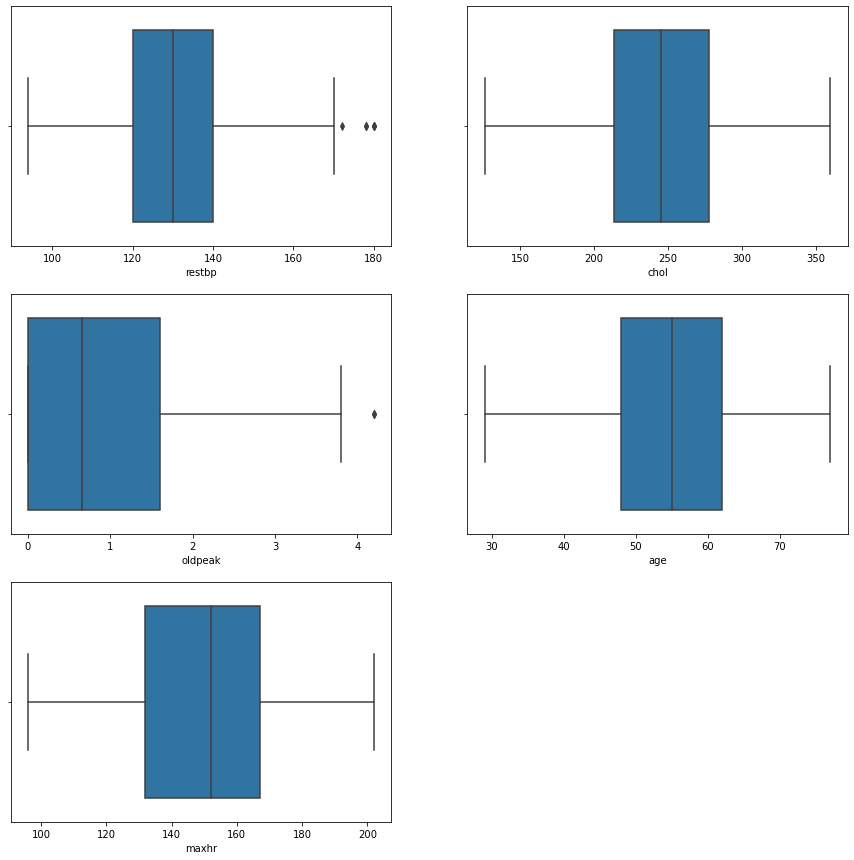

In [139]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(df2_copy1.restbp)
plt.subplot(3,2,2)
sns.boxplot(df2_copy1.chol)
plt.subplot(3,2,3)
sns.boxplot(df2_copy1.oldpeak)
plt.subplot(3,2,4)
sns.boxplot(df2_copy1.age)
plt.subplot(3,2,5)
sns.boxplot(df2_copy1.maxhr)

In [125]:
q1=df2_copy.quantile(.25)
q3=df2_copy.quantile(.75)

iqr=q3-q1
iqr

slope       1.00
thal        1.00
restbp     20.00
chestpt     1.00
vessels     1.00
fbs         0.00
restekg     2.00
chol       67.50
oldpeak     1.60
sex         1.00
age        14.00
maxhr      34.25
exrang      1.00
target      1.00
dtype: float64

In [128]:
df2_copy1= df2_copy[~((df2_copy<(q1-1.5*iqr))|(df2_copy>(q3+1.5*iqr))).any(axis=1)]
df2_copy1.shape

(128, 14)

In [146]:
z=np.abs(stats.zscore(df2_copy['oldpeak']))

In [147]:
np.where(z>3)

(array([140, 162], dtype=int64),)

In [187]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [190]:
param_grid =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

In [195]:
grid = GridSearchCV(classifier,param_grid,cv=10, verbose=3)
grid.fit(X,y)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
[CV] C=0.0001, max_iter=100, penalty=l1, solver=lbfgs ................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=lbfgs ................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=lbfgs ................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=lbfgs ................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=lbfgs ................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=lbfgs ................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_it

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.0001, max_iter=100, penalty=l1, solver=sag ..................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=sag ..................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=sag ..................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=sag ..................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l1, solver=saga .................
[CV]  C=0.0001, max_ite

[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.500, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l2, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l2, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.778, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l2, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l2, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.611, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l2, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.500, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=l2, solver=saga .................
[CV]  C=0.0001, max_iter=100, penalty=l2, solver=saga, score=0.722, total=   0.0s


[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.0001, max_iter=100, penalty=none, solver=lbfgs ..............
[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.0001, max_iter=100, penalty=none, solver=lbfgs ..............
[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.1s
[CV] C=0.0001, max_iter=100, penalty=none, solver=lbfgs ..............
[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.1s
[CV] C=0.0001, max_iter=100, penalty=none, solver=lbfgs ..............
[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.0001, max_iter=100, penalty=none, solver=lbfgs ..............
[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=0.667, total=   0.1s
[CV] C=0.0001, max_iter=100, penalty=none, solver=lbfgs ..............
[CV]  C=0.0001, max_iter=100, penalty=none, solver=lbfgs, score=

[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l1, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l1, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0

[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l2, solver=saga, score=0.778, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l2, solver=saga, score=0.500, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.0001, max_iter=1000, penalty=l2, solver=saga ................
[CV] 

[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.0001, max_iter=1000, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0001, max_iter=1000, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0001, max_iter=1000, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.5s
[CV] C=0.0001, max_iter=1000, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.4s
[CV] C=0.0001, max_iter=1000, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.0001, max_iter=1000, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=1000, penalty=none, solver=lbfgs,

[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l1, solver=sag .................
[CV]  C=0.0001, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0001,

[CV]  C=0.0001, max_iter=2500, penalty=l2, solver=saga, score=0.778, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=2500, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=2500, penalty=l2, solver=saga, score=0.611, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=2500, penalty=l2, solver=saga, score=0.500, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=2500, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=l2, solver=saga ................
[CV]  C=0.0001, max_iter=2500, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=elasticnet, solver=lbfgs .......
[CV]  C=0.0001, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, 

[CV]  C=0.0001, max_iter=2500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=elasticnet, solver=saga ........
[CV]  C=0.0001, max_iter=2500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=elasticnet, solver=saga ........
[CV]  C=0.0001, max_iter=2500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=2500, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.0001, max_iter=2500, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.0001, max_iter=2500, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0001, max_iter=2500, penalty=none, solver=lbfgs .............
[CV]  C=0.0001, max_iter=2500, penalty=none, solv

[CV]  C=0.0001, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.

[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=lbfgs, score=0.556, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l2, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l2, solver=lbfgs ...............
[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg, score=0.667, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg, score=0.389, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg, score=0.556, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=l2, solver=newton-cg ...........
[CV]  C=0.0001, max_iter=5000, penalty=l2, solver=newton-c

[CV]  C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg ...
[CV]  C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg ...
[CV]  C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg ...
[CV]  C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg ...
[CV]  C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=elasticnet, solver=liblinear ...
[CV]  C=0.0001, max_iter=5000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=elasticnet, solver=liblinear ...
[CV]  C=0.

[CV]  C=0.0001, max_iter=5000, penalty=none, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=0.0001, max_iter=5000, penalty=none, solver=liblinear .........
[CV]  C=0.0001, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=none, solver=liblinear .........
[CV]  C=0.0001, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=none, solver=liblinear .........
[CV]  C=0.0001, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=none, solver=liblinear .........
[CV]  C=0.0001, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=none, solver=liblinear .........
[CV]  C=0.0001, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0001, max_iter=5000, penalty=none, solver=liblinear .........
[CV]  C=0.0001, max_iter=5000, penalty=none,

[CV]  C=0.00026366508987303583, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=l1, solver=saga .
[CV]  C=0.00026366508987303583, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs, score=0.389, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs, score=0.611, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=

[CV]  C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.00026366508987303583

[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penal

[CV] C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga, score=0.444, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga, score=0.500, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=saga, score=0

[CV]  C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.000263665

[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0

[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg, score=0.833, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg, score=0.667, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg, score=0.500, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0

[CV]  C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, 

[CV]  C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag, score=0.667, total=   0.1s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag 
[CV]  C=0.00026366508987303583, max_iter=2500, penalty=none, solver=sag, score=0.778, total=   0.1s
[CV] C=0.00026366508987303583, max_iter=

[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs, score=0.389, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, p

[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.0s
[CV] C=0.00026366508987303583, max_iter=5000, penal

[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.000263665

[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga, score=0.722, total=   0.2s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga 
[CV]  C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs .
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs .
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs .
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalt

[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga ..
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga ..
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga ..
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l2, solver=lbfgs .
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l2, solver=lbfgs .
[CV]  C=0.0006951927961775605, max_iter=100, penalty=l2, solver=lbfgs, score=0.389, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=l2, solve

[CV]  C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.0006951927961775605, max_ite

[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag ..
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag ..
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sa

[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag ..
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag ..
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag ..
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag, score=0.833, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag ..
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=l2, solve

[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.0006951927961775605,

[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga, score=0.611, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga 
[CV]  C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga, score=0.667, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty

[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=lbfgs, score=0.389, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l2

[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=saga, score=0.833, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=saga, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.

[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=0.0006951927961775605,

[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga 
[CV]  C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l1,

[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=saga .
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs, score=0.389, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs, score=0.611, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=

[CV]  C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0006951927961775605, max_iter=

[CV]  C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag, score=0.778, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag, score=0.778, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag, score=0.833, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag, score=0.833, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag, score=0.889, total=   0.3s
[CV] C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag 
[CV]  C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag, score=0.889, total=   0.2s
[CV] C=0.0006951927961775605, max_iter=5000, penalt

[CV]  C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga ..
[CV]  C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga ..
[CV]  C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs .
[CV]  C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs .
[CV]  C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs, score=0.444, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs .
[CV]  C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=l2, solv

[CV]  C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0

[CV]  C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga, score=0.833, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga, score=0.611, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l1, so

[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs, score=0.722, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs, score=0.500, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalt

[CV] C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=sag 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty

[CV]  C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag, score=0.667, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag, score=0.778, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag, score=0.889, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag, score=0.889, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag, score=0.611, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag 
[CV]  C=0.0018329807108324356, max_iter=1000, penalty=none, solver=sag, score=0.667, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=1000, penalt

[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=lbfgs, score=0.444, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l2

[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=saga, score=0.833, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=l2, solver=saga, score=0.667, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001

[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.0018329807108324356,

[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga, score=0.667, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty

[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs, score=0.444, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l

[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga .
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga, score=0.667, total=   0.1s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001832980710832435

[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.0018329807108324356,

[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga, score=0.722, total=   0.2s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga 
[CV]  C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l1, sol

[CV]  C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs, score=0.500, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs, score=0.556, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.004832930238571752, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=l2, solver=l

[CV]  C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.004832930238571752, max_iter=100, penalty=

[CV]  C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag ...
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga, score=0.611, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga, score=0.500, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga, score=0.722, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga .

[CV]  C=0.004832930238571752, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.1s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l2, solver=sag ...
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l2, solver=sag, score=0.833, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l2, solver=sag ...
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l2, solver=saga, score=0.444, total=   0.1s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=1000, penalty=l2, solver=saga, score=0.556, total=   0.0s
[CV] C=0.004832930238571752, max_iter=1000, penalty=l2, solver=sag

[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.004832930238571752, max_iter=10

[CV]  C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga, score=0.667, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l1, solver=lbf

[CV]  C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs, score=0.611, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs, score=0.500, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=l2, s

[CV]  C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag 
[CV]  C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, tota

[CV]  C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag, score=0.667, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag .
[CV]  C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag, score=0.778, total=   0.1s
[CV] C=0.004832930238571752, max_iter=2500, penalty=none,

[CV]  C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga, score=0.722, total=   0.0s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga, score=0.611, total=   0.0s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.0s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga, score=0.556, total=   0.0s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga, score=0.500, total=   0.0s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l1, solver=saga, score=0.722, total=   0.0s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l1, solver=

[CV]  C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga, score=0.667, total=   0.1s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.004832930238571752, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=0.004832930238571752, max_iter=5000, penalty=l2, solver=

[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.004832930238571752, max_iter=50

[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga 
[CV]  C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs

[CV]  C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs, score=0.556, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs ..
[CV]  C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=l2, solver=l

[CV]  C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.012742749857031334, max_iter=100, penalty=

[CV]  C=0.012742749857031334, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear, score=0.444, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear, score=0.556, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l1, solver=liblinear, score=0.722, total=   0.0s
[CV] C=0.0127427498570

[CV]  C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg, score=0.667, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg, score=0.833, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg, score=0.833, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear, score=0.722, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear, score=0.556, total=   0.0s
[CV] C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.012742749

[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.012742749857031334, max_iter=10

[CV]  C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga, score=0.667, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbf

[CV]  C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs, score=0.500, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs .
[CV]  C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=l2, s

[CV]  C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penal

[CV]  C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV]

[CV]  C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga, score=0.722, total=   0.0s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga, score=0.722, total=   0.0s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.0s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga, score=0.500, total=   0.0s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga, score=0.500, total=   0.0s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.0s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l1, solver=

[CV]  C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga, score=0.667, total=   0.2s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.2s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.1s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga, score=0.611, total=   0.2s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga ..
[CV]  C=0.012742749857031334, max_iter=5000, penalty=l2, solver=saga, score=0.611, total=   0.2s
[CV] C=0.012742749857031334, max_iter=5000, penalty=l2, solver=

[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.012742749857031334, max_iter=50

[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga 
[CV]  C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs ...


[CV]  C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs, score=0.722, total=   0.1s
[CV] C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=l2, solver=newton-c

[CV] C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=elasticnet, solver=l

[CV]  C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg, score=0.889, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781

[CV] C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear, score=0.500, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear, score=0.556, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear, score=0.722, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l1, sol

[CV]  C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear, score=0.889, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear, score=0.722, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear, score=0.889, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear, score=0.833, total=   0.0s
[CV] C=0.03359818286283781, max_iter=1000, penalty=l2, solver=sag ....
[CV]  C=0.03359818286283781, max_iter=1000, penalty=l2, solver=sag, score=0.722, total=   0.0s
[CV] C=0.03359818286283781, max_iter=

[CV]  C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=0.03359818286283781, max_iter=1000, penalty=

[CV]  C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]

[CV]  C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs, score=0.611, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg, score=0.722, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=l2, solver=newton-cg, score=0.611, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=

[CV]  C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.03359818286283781, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=0.03359818286283781, max_iter=2500, penalty=elasticn

[CV]  C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag, score=0.778, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag, score=0.667, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag, score=0.833, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag, score=0.833, total=   0.2s
[CV] C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag ..
[CV]  C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=0.03359818286283781, max_iter=2500, penalty=none, solver

[CV]  C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga, score=0.444, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga, score=0.500, total=   0.0s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga, score=0.722, total=   0.0s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.0s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga, score=0.500, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga ..

[CV]  C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga, score=0.556, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.2s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga ..

[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.4s
[CV] C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=

[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.3s
[CV] C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga .
[CV]  C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.3s
[CV] C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs ...
[C

[CV]  C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs ..

[CV]  C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs .
[CV]  C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs .
[CV]  C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs .
[CV]  C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs .
[CV]  C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs .
[CV]  C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.08858667904100823, max_iter=100, penalty=none, s

[CV]  C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l1, solver=sag ....
[CV]  C=0.088586

[CV]  C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag, score=0.722, total=   0.1s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag ....
[CV]  C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag, score=0.833, total=   0.0s
[CV] C=0.08858667904100823, max_iter=1000, penalty=l2, solver=sag ....
[CV]

[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.08858667904100823, max_iter=1000, penalty=

[CV]  C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga, score=0.667, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs ..
[

[CV]  C=0.08858667904100823, max_iter=2500, penalty=l1, solver=saga, score=0.667, total=   0.2s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=lb

[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=l2, solver=saga ...
[CV]  C=0.08858667904100823, max_iter=2500, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667

[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=0.08858667904100823, max_iter=2500, penalty=

[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga .
[CV]  C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs .

[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga, score=0.889, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfg

[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga, score=0.667, total=   0.2s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.08858667904100823, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.08858667904100823, max_iter=5000, 

[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=0.08858667904100823, max_iter=5000, penalty=

[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga .
[CV]  C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs ...
[C

[CV]  C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs, score=0.722, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs ...
[CV]  C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs, score=0.611, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=l2, solver=lbfgs ..

[CV]  C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs .
[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.23357214690901212

[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=saga, score=0.667, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=none, solver=saga ..
[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=saga, score=0.667, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=none, solver=saga ..
[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=saga, score=0.500, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=none, solver=saga ..
[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=saga, score=0.556, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=none, solver=saga ..
[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=saga, score=0.833, total=   0.0s
[CV] C=0.23357214690901212, max_iter=100, penalty=none, solver=saga ..
[CV]  C=0.23357214690901212, max_iter=100, penalty=none, solver=saga, score=0.611, total=   0.0s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l1, solver=l

[CV]  C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga, score=0.833, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l1, solver=saga, score=0.667, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l2, solver=lbfgs, score=0.833, total=   0.2s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l2, solver=lbfgs

[CV]  C=0.23357214690901212, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l2, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=l2, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=1000, penalty=l2, solver=saga, score=0.667, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, ma

[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.23357214690901212, max_iter=1000, penalty=

[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga .
[CV]  C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga, score=0.667, total=   0.1s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs .

[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga, score=0.667, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga, score=0.889, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga, score=0.667, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfg

[CV]  C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga, score=0.667, total=   0.1s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, ma

[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.23357214690901212, max_iter=2500, penalty=

[CV]  C=0.23357214690901212, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs ..
[

[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga, score=0.889, total=   0.4s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga, score=0.778, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.1s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs ..
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbf

[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=saga, score=0.667, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=l2, solver=saga ...
[CV]  C=0.23357214690901212, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.23357214690901212, ma

[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs 
[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=

[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga .
[CV]  C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.3s
[CV] C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=0.

[CV]  C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.1s
[CV] C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs, score=0.611, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=0.

[CV]  C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, 

[CV] C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear, sco

[CV]  C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l1

[CV] C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear, score=0.889, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear, score=0.611, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear, score=0.889, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=1000, penalty=l2, solver=sag, score=0.722, 

[CV]  C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.615848211066026, max_iter=1000, penalty=none, solver=l

[CV]  C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l1

[CV]  C=0.615848211066026, max_iter=2500, penalty=l2, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=0.615848211066026, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=0.

[CV]  C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.615848211066026, max_iter=2500, penalty=none, solver=l

[CV] C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=0.615848211066026, max_iter=5000, penalty=l1, solver=liblinear, score=0

[CV]  C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=0.615848

[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=0.615848211066026, max_iter=5000, penalty=none, solver=l

[CV]  C=0.615848211066026, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=1.62377673

[CV]  C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs, score=0.611, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=1.

[CV]  C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, 

[CV] C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg, score=0.778, total=   0.1s
[CV] C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg, score=0.889, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear, s

[CV]  C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga, score=0.722, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga, score=0.611, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga, score=0.611, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga, score=0.778, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga, score=0.889, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga, score=0.722, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=1.

[CV]  C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=1.

[CV] C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=sag 
[CV]  C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga 
[CV]  C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga 
[CV]  C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga 
[CV]  C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga 
[CV]  C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=saga 
[CV]  C=1.623776739188721, max_iter=1000, penalty=elasticn

[CV]  C=1.623776739188721, max_iter=1000, penalty=none, solver=sag, score=0.667, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=none, solver=sag ....
[CV]  C=1.623776739188721, max_iter=1000, penalty=none, solver=sag, score=0.833, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=none, solver=sag ....
[CV]  C=1.623776739188721, max_iter=1000, penalty=none, solver=sag, score=0.722, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=none, solver=saga ...
[CV]  C=1.623776739188721, max_iter=1000, penalty=none, solver=saga, score=0.722, total=   0.0s
[CV] C=1.623776739188721, max_iter=1000, penalty=none, solver=saga ...
[CV]  C=1.623776739188721, max_iter=1000, penalty=none, solver=saga, score=0.611, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=none, solver=saga ...
[CV]  C=1.623776739188721, max_iter=1000, penalty=none, solver=saga, score=0.611, total=   0.1s
[CV] C=1.623776739188721, max_iter=1000, penalty=none, solver=saga ...
[

[CV]  C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga, score=0.722, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga, score=0.722, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga, score=0.833, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga, score=0.889, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga, score=0.889, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga .....
[CV]  C=1.

[CV]  C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga, score=0.833, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga .....
[CV]  C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga .....
[CV]  C=1.

[CV]  C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=1.623776739188721, max_iter=2500, penalty=none, solver=l

[CV]  C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=1.623776739188721, max_iter=5000, penalty=l1

[CV]  C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=1.623776

[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=1.623776739188721, max_iter=5000, penalty=none, solver=l

[CV]  C=1.623776739188721, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.3s
[CV] C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=4.28133239

[CV]  C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=4.

[CV]  C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, 

[CV] C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg, score=0.889, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear, s

[CV]  C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l1, so

[CV]  C=4.281332398719396, max_iter=1000, penalty=l2, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear, score=0.833, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear 
[CV]  C=4.281332398719396, max_iter=1000, penalty=l2, solver=liblinear, score=0.944, total=   0.0s
[CV] C=4.281332398719396, max_iter=1000, penalty=l2

[CV]  C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=4.281332398719396, max_iter=1000, penalty=none, solver=l

[CV]  C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg 


[CV]  C=4.281332398719396, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=4.281332398719396, max_iter=2500, penalty=l2, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg, score=0.833, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=4.281332398719396, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=4.281332398719396, max_iter=2500, penalty=l2, solver

[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=4.281332398719396, max_iter=2500, penalty=none, solver=l

[CV]  C=4.281332398719396, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=4.281

[CV]  C=4.281332398719396, max_iter=5000, penalty=l1, solver=saga, score=0.833, total=   0.4s
[CV] C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.4s
[CV] C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV] 

[CV]  C=4.281332398719396, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4.281332398719396, 

[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=4.281332398719396, max_iter=5000, penalty=none, solver=l

[CV]  C=4.281332398719396, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=11.28

[CV]  C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]

[CV]  C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=100, penalty=none, solver=l

[CV]  C=11.288378916846883, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l1, so

[CV]  C=11.288378916846883, max_iter=1000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=1000, penalty=l2, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=1000, penalty=l2, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg 
[CV]  C=11.288378916846883, max_iter=1000, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty

[CV]  C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear 
[CV]  C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag 
[CV]  C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag, s

[CV]  C=11.288378916846883, max_iter=1000, penalty=none, solver=sag, score=0.889, total=   0.1s
[CV] C=11.288378916846883, max_iter=1000, penalty=none, solver=sag ...
[CV]  C=11.288378916846883, max_iter=1000, penalty=none, solver=sag, score=0.889, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=none, solver=sag ...
[CV]  C=11.288378916846883, max_iter=1000, penalty=none, solver=sag, score=0.611, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=none, solver=sag ...
[CV]  C=11.288378916846883, max_iter=1000, penalty=none, solver=sag, score=0.667, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=none, solver=sag ...
[CV]  C=11.288378916846883, max_iter=1000, penalty=none, solver=sag, score=0.833, total=   0.0s
[CV] C=11.288378916846883, max_iter=1000, penalty=none, solver=sag ...
[CV]  C=11.288378916846883, max_iter=1000, penalty=none, solver=sag, score=0.722, total=   0.1s
[CV] C=11.288378916846883, max_iter=1000, penalty=none, solver=saga .

[CV]  C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga, score=0.722, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga, score=0.556, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga, score=0.778, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga, score=0.833, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga, score=0.889, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga, score=0.889, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga ....
[CV]

[CV]  C=11.288378916846883, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga, score=0.833, total=   0.1s
[CV] C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=11.288378916846883, max_iter=2500, penalty=l2, solver=saga ....
[CV] 

[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, s

[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=11.288378916846883, max_iter=2500, penalty=none, solver=saga ..
[CV]  C=11.288378916846883, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]

[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga, score=0.667, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga, score=0.889, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga ....
[CV]  C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga, score=0.833, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.2s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs ...
[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs ...
[

[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga ....
[CV]  C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=11.288378916846883, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=11.288378916846883, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=11.288378916846883, max_iter=5000, penalty=e

[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, s

[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=11.288378916846883, max_iter=5000, penalty=none, solver=saga ..
[CV]  C=11.288378916846883, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs ....
[CV]  C=

[CV]  C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]  C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs ....
[CV]

[CV]  C=29.763514416313132, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=29.763514416313132, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=elasticnet, solver=saga 
[CV]  C=29.763514416313132, max_iter=100, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs ..
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty

[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=saga ...
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=saga, score=0.500, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=saga ...
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=saga, score=0.556, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=saga ...
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=saga, score=0.833, total=   0.0s
[CV] C=29.763514416313132, max_iter=100, penalty=none, solver=saga ...
[CV]  C=29.763514416313132, max_iter=100, penalty=none, solver=saga, score=0.611, total=   0.0s
[CV] C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[C

[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga, score=0.722, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga ....
[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga, score=0.556, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga ....
[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga, score=0.611, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga ....
[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga, score=0.889, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga ....
[CV]  C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga, score=0.667, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l2, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=1000, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=29.763514416313132, max_iter=1000, penalty=l2, solver=lbfgs ...
[CV

[CV]  C=29.763514416313132, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l2, solver=saga ....
[CV]  C=29.763514416313132, max_iter=1000, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=l2, solver=saga ....
[CV]  C=29.763514416313132, max_iter=1000, penalty=l2, solver=saga, score=0.667, total=   0.1s
[CV] C=29.763514416313132, max_iter=1000, penalty=elasticnet, solver=lbfgs 
[CV]  C=29.763514416313132, max_iter=1000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=1000, penalty=elasticnet, solver=lbfgs 
[CV]  C=29.763514416313132, max_iter=1000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=1000, penalty=elasticnet, solver=lbfgs 
[CV]  C=29.763514416313132, max_iter=1000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=100

[CV]  C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=29.763514416313132, max_iter=1000, penalty=none, s

[CV] C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l1, solver=liblinear, score

[CV]  C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg, score=0.944, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg, score=0.889, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg, score=0.667, total=   0.1s
[CV] C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg 
[CV]  C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=29.763514416313132, max_iter=2500

[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, s

[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=saga, score=0.889, total=   0.1s
[CV] C=29.763514416313132, max_iter=2500, penalty=none, solver=saga ..
[CV]  C=29.763514416313132, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs ...
[CV]

[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=saga, score=0.722, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=saga ....
[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=saga, score=0.889, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l1, solver=saga ....
[CV]  C=29.763514416313132, max_iter=5000, penalty=l1, solver=saga, score=0.833, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.2s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs ...
[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs ...
[

[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga ....
[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga, score=0.722, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga ....
[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga, score=0.889, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga ....
[CV]  C=29.763514416313132, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=29.763514416313132, max_iter=5000, penalty=e

[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs .
[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, s

[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=saga, score=0.889, total=   0.2s
[CV] C=29.763514416313132, max_iter=5000, penalty=none, solver=saga ..
[CV]  C=29.763514416313132, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=78.4

[CV]  C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=78

[CV]  C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=newton-cg 
[CV]  C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=78.475997035146

[CV]  C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.1s
[CV] C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs, score=0.889, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg 
[CV]  C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=78.47599703514607, max_iter=100, penalty=none, solver=new

[CV]  C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l1

[CV]  C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag, score=0.778, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag, score=0.611, total=   0.0s
[CV] C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=78.47599703514607, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=78.47599

[CV]  C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=78.47599703514607, max_iter=1000, penalty=none, solver=l

[CV]  C=78.47599703514607, max_iter=2500, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=78.47599703514607, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=2500, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=78.47599703514607, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=78.47599703514607, max_iter=2500, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag ......
[CV]

[CV]  C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=78.47599703514607, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=78.47599

[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.4s
[CV] C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=78.47599703514607, max_iter=2500, penalty=none, solver=l

[CV]  C=78.47599703514607, max_iter=2500, penalty=none, solver=saga, score=0.722, total=   0.1s
[CV] C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=l1, solver=lbfgs ....
[CV]  C=78.47

[CV]  C=78.47599703514607, max_iter=5000, penalty=l1, solver=saga, score=0.833, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV]  C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs ....
[CV] 

[CV]  C=78.47599703514607, max_iter=5000, penalty=l2, solver=saga, score=0.833, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs 
[CV]  C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=78.47599703514607, 

[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=78.47599703514607, max_iter=5000, penalty=none, solver=l

[CV]  C=78.47599703514607, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=206.91380811147

[CV]  C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=206.9138

[CV]  C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs ....
[CV]

[CV]  C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, 

[CV]  C=206.913808111479, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.1s
[CV] C=206.913808111479, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l2, solver=sag, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=206.913808111479, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=1000, penalty=l2, solver=sag, score=0.611, total=   0.1s
[CV] C=206.913808111479, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=206.9138081114

[CV]  C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.4s
[CV] C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs ..

[CV]  C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=206.9138081114

[CV]  C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=20

[CV] C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=206.

[CV]  C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg 
[CV]  C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=2500, penalty=

[CV]  C=206.913808111479, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=206.913808111479, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=206.913808111479, max_iter

[CV]  C=206.913808111479, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=206.913808111479, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=206.913808111479, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=206.913808111479, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=206.913808111479, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=206.913808111479, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=206.9138081114

[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.5s
[CV] C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs ..

[CV]  C=206.913808111479, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.3s
[CV] C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=545.5594781

[CV]  C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=54

[CV]  C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, 

[CV]  C=545.5594781168514, max_iter=100, penalty=none, solver=saga, score=0.667, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=none, solver=saga ....
[CV]  C=545.5594781168514, max_iter=100, penalty=none, solver=saga, score=0.389, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=none, solver=saga ....
[CV]  C=545.5594781168514, max_iter=100, penalty=none, solver=saga, score=0.556, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=none, solver=saga ....
[CV]  C=545.5594781168514, max_iter=100, penalty=none, solver=saga, score=0.722, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=none, solver=saga ....
[CV]  C=545.5594781168514, max_iter=100, penalty=none, solver=saga, score=0.667, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=none, solver=saga ....
[CV]  C=545.5594781168514, max_iter=100, penalty=none, solver=saga, score=0.667, total=   0.0s
[CV] C=545.5594781168514, max_iter=100, penalty=none, solver=saga ....
[CV]

[CV]  C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga, score=0.722, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga, score=0.611, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga, score=0.611, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga, score=0.778, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga, score=0.889, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga, score=0.722, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga .....
[CV]  C=54

[CV]  C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga, score=0.611, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga, score=0.889, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga, score=0.722, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga, score=0.556, total=   0.1s
[CV] C=545.5594781168514, max_iter=1000, penalty=l2, solver=saga .....
[CV]  C=54

[CV]  C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=545.5594781168514, max_iter=1000, penalty=none, solver=l

[CV] C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear, score=0

[CV]  C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=545.5594781168514, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=545.5594

[CV]  C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=545.5594781168514, max_iter=2500, penalty=none, solver=l

[CV] C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=545.5594781168514, max_iter=5000, penalty=l1, solver=liblinear, score=0

[CV]  C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=545.5594

[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=545.5594781168514, max_iter=5000, penalty=none, solver=l

[CV]  C=545.5594781168514, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs ......
[CV]  C=1438.4498882876

[CV]  C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=l2, solver=lbfgs ......
[CV]  C=1438.449

[CV]  C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.1s
[CV] C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs ....
[CV]  C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs ....
[CV]

[CV]  C=1438.44988828766, max_iter=1000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, 

[CV]  C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.1s
[CV] C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag, score=0.778, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag, score=0.611, total=   0.1s
[CV] C=1438.44988828766, max_iter=1000, penalty=l2, solver=sag .......
[CV]  C=1438.449888287

[CV]  C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=1438.44988828766, max_iter=1000, penalty=none, solver=lbfgs ..

[CV]  C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg .
[CV]  C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=l1, solver=newton-cg .
[CV]  C=1438.44988

[CV]  C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.2s
[CV] C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs .....
[CV]  C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=1438.44988828766, max_iter=2500, penalty=l2, solver=newton-cg .
[CV]  C=1438.44988828766, max_iter=2500, penalty=l2, solver=newton-cg, score=0.833, total=   0.1s
[CV] C=1438.44988828766, max_iter=2500, penalty=l2, solver=newton-cg .
[CV]  

[CV] C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=newton-cg 
[CV]  C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=elasticnet, solver=liblinear 
[CV]  C=1438

[CV]  C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg, score=0.889, total=   0.1s
[CV] C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear 
[CV]  C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=2500, penalty=no

[CV]  C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag .......
[CV]  C=1438.44988828766, max_iter

[CV]  C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=l2, solver=sag .......
[CV]  C=1438.449888287

[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.4s
[CV] C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs ...
[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=1438.44988828766, max_iter=5000, penalty=none, solver=lbfgs ..

[CV]  C=1438.44988828766, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs .....
[CV]  C=3792.690190

[CV]  C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.1s
[CV] C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.1s
[CV] C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs .....
[CV]  C=37

[CV]  C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs, score=0.833, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs ...
[CV]  C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=3792.690190732246, max_iter=100, penalty=none, solver=lbfgs ..

[CV]  C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag ......
[CV]

[CV]  C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag, score=0.556, total=   0.1s
[CV] C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag, score=0.611, total=   0.1s
[CV] C=3792.690190732246, max_iter=1000, penalty=l2, solver=sag ......
[CV]  C=3792.690

[CV]  C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.4s
[CV] C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.4s
[CV] C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.3s
[CV] C=3792.690190732246, max_iter=1000, penalty=none, solver=l

[CV]  C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=2500, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=2500, penalty=l1

[CV]  C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag, score=0.667, total=   0.1s
[CV] C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag, score=0.833, total=   0.1s
[CV] C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag, score=0.889, total=   0.1s
[CV] C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=3792.690190732246, max_iter=2500, penalty=l2, solver=sag ......
[CV]  C=3792.690

[CV]  C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=3792.690190732246, max_iter=2500, penalty=none, solver=l

[CV]  C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear 
[CV]  C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=3792.690190732246, max_iter=5000, penalty=l1

[CV]  C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=l2, solver=sag ......
[CV]  C=3792.690

[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs ..
[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=3792.690190732246, max_iter=5000, penalty=none, solver=l

[CV]  C=3792.690190732246, max_iter=5000, penalty=none, solver=saga, score=0.833, total=   0.2s
[CV] C=10000.0, max_iter=100, penalty=l1, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l1, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l1, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l1, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l1, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l1, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l1, solver=lbfgs, score=nan, 

[CV]  C=10000.0, max_iter=100, penalty=l2, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l2, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l2, solver=lbfgs, score=0.889, total=   0.1s
[CV] C=10000.0, max_iter=100, penalty=l2, solver=lbfgs ...............
[CV]  C=10000.0, max_iter=100, penalty=l2, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l2, solver=newton-cg ...........
[CV]  C=10000.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.833, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l2, solver=newton-cg ...........
[CV]  C=10000.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l2, solver=newton-cg ...........
[CV]  C=10000.0, max_iter=100, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=l2, solver=newton-cg ...........
[CV]  C=10000.0, max_iter=100, penalty=l2, solver=newton-c

[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=none, solver=lbfgs .............
[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=none, solver=lbfgs .............
[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=none, solver=lbfgs .............
[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs, score=0.944, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=none, solver=lbfgs .............
[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=none, solver=lbfgs .............
[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs, score=0.667, total=   0.0s
[CV] C=10000.0, max_iter=100, penalty=none, solver=lbfgs .............
[CV]  C=10000.0, max_iter=100, penalty=none, solver=lbfgs,

[CV]  C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, score=0.667, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=1000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=1000, penalty=

[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.889, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.611, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.667, total=   0.0s
[CV] C=10000.0, max_iter=1000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=1000, penalty=l2, solver=sag, score=0.833, total= 

[CV]  C=10000.0, max_iter=1000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=10000.0, max_iter=1000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=10000.0, max_iter=1000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=1000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=1000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=10000.0, max_iter=1000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=1000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=10000.0, max_iter=1000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=1000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=10000.0, max_iter=1000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=1000, penalty=none, solver

[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total= 

[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs, score=0.667, total=   0.3s
[CV] C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs ..............
[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg ..........
[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg, score=0.833, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg ..........
[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=2500, penalty=l2, solver=newton-cg ..........
[CV]  C=10000.0, max_iter=2500, penalty=l2, solver=newto

[CV]  C=10000.0, max_iter=2500, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=10000.0, max_iter=2500, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=2500, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=2500, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=2500, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=10000.0, max_iter=2500, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=2500, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=10000.0, max_iter=2500, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=2500, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=10000.0, max_iter=2500, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=2500, penalty=none, solver

[CV]  C=10000.0, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=5000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=5000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=5000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=5000, penalty=l1, solver=liblinear, score=0.944, total=   0.0s
[CV] C=10000.0, max_iter=5000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=5000, penalty=l1, solver=liblinear, score=0.889, total=   0.0s
[CV] C=10000.0, max_iter=5000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=5000, penalty=l1, solver=liblinear, score=0.778, total=   0.0s
[CV] C=10000.0, max_iter=5000, penalty=l1, solver=liblinear ..........
[CV]  C=10000.0, max_iter=5000, penalty=

[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.833, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.889, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=l2, solver=sag ................
[CV]  C=10000.0, max_iter=5000, penalty=l2, solver=sag, score=0.778, total= 

[CV]  C=10000.0, max_iter=5000, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=10000.0, max_iter=5000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=10000.0, max_iter=5000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=5000, penalty=none, solver=lbfgs, score=0.778, total=   0.3s
[CV] C=10000.0, max_iter=5000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=5000, penalty=none, solver=lbfgs, score=0.944, total=   0.3s
[CV] C=10000.0, max_iter=5000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=5000, penalty=none, solver=lbfgs, score=0.889, total=   0.2s
[CV] C=10000.0, max_iter=5000, penalty=none, solver=lbfgs ............
[CV]  C=10000.0, max_iter=5000, penalty=none, solver

[Parallel(n_jobs=1)]: Done 16000 out of 16000 | elapsed: 12.9min finished


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [196]:
grid.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [197]:
grid.best_score_

0.85